In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [5]:
model = tf.keras.models.Sequential()

In [6]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2666 - accuracy: 0.9219
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1072 - accuracy: 0.9664
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0717 - accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0537 - accuracy: 0.9826
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0404 - accuracy: 0.9865


In [9]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_acc}")

313/313 [==============================] - 1s 4ms/step - loss: 0.0824 - accuracy: 0.9755
Validation Loss: 0.0823625698685646, Validation Accuracy: 0.9754999876022339


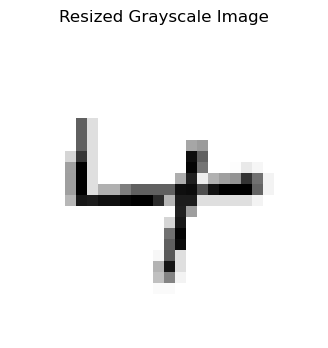

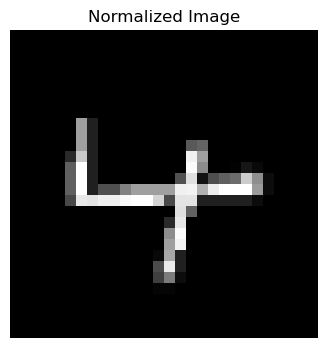

1/1 [==============================] - 0s 127ms/step
Prediction probabilities: [[5.0205934e-15 1.2002834e-08 3.4894396e-10 4.1959234e-13 9.9999607e-01
  1.8417283e-11 3.5467338e-06 3.1593594e-08 2.8430329e-09 3.9033927e-07]]
Predicted digit: 4


In [11]:
import matplotlib.pyplot as plt

image_path = 'C:/Users/aksha/Desktop/Coding/Mini_Project/received_image.png'

img = Image.open(image_path).convert('L')  
img = img.resize((28, 28))                 

img_array = np.array(img)

plt.figure(figsize=(4, 4))
plt.title("Resized Grayscale Image")
plt.imshow(img_array, cmap='gray')
plt.axis('off')
plt.show()

img_array_normalized = (np.invert(img_array)) / 255.0 

plt.figure(figsize=(4, 4))
plt.title("Normalized Image")
plt.imshow(img_array_normalized, cmap='gray')
plt.axis('off')
plt.show()

img_array_reshaped = img_array_normalized.reshape(1, 28, 28, 1)

prediction = model.predict(img_array_reshaped)
predicted_digit = np.argmax(prediction)

print(f"Prediction probabilities: {prediction}")
print(f"Predicted digit: {predicted_digit}")


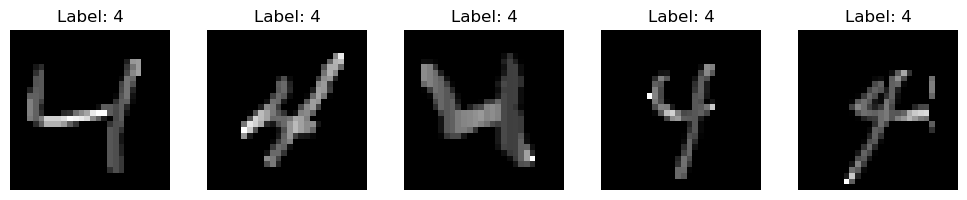

In [14]:
six_indices = np.where(y_train == 4)[0]

num_samples = 5
plt.figure(figsize=(10, 2))

for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(x_train[six_indices[i]], cmap='gray')
    plt.title(f"Label: {y_train[six_indices[i]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [13]:
model.save('mnist_model.h5')